# **ARAVINDAN N'S PREDICTIVE MODELLING PROJECT NOTEBOOK**

In [ ]:
#Import the necessarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name	Description
Carat	 Carat weight of the cubic zirconia.
Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color 	 Colour of the cubic zirconia.With D being the worst and J the best.
Clarity	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price	 the Price of the cubic zirconia.
X	 Length of the cubic zirconia in mm.
Y	 Width of the cubic zirconia in mm.
Z	 Height of the cubic zirconia in mm.

Dataset for Problem 1: cubic_zirconia.csv

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [ ]:
zirc_df = pd.read_csv('/cubic_zirconia.csv')
zirc_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
zirc_df = zirc_df.drop(columns='Unnamed: 0')
zirc_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
zirc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
rows, cols = zirc_df.shape
print('There are {} rows and {} columns in the dataset'.format(rows,cols))

There are 26967 rows and 10 columns in the dataset


In [ ]:
zirc_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [ ]:
zirc_df.duplicated().sum()

34

In [ ]:
# Removing duplicate rows
print(f'Shape of the dataset before removing duplicates{zirc_df.shape}')
zirc_df.drop_duplicates(inplace=True)
print(f'Shape of the dataset after removing duplicates{zirc_df.shape}')

Shape of the dataset before removing duplicates(26967, 10)
Shape of the dataset after removing duplicates(26933, 10)


#### Univariate Analysis

In [ ]:
# Statistical summary of the dataset
zirc_df_stat = zirc_df.describe().T
zirc_df_stat

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [ ]:
zirc_df_stat['Skew']=zirc_df.skew(axis=0)
zirc_df_stat['Kurtosis']=zirc_df.kurtosis(axis=0)
zirc_df_stat

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50,1.114789,1.210845
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60,-0.026086,3.682110
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00,0.765805,1.583710
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23,0.392290,-0.679199
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90,3.867764,160.042914
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80,2.580665,87.423301
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00,1.619116,2.152553


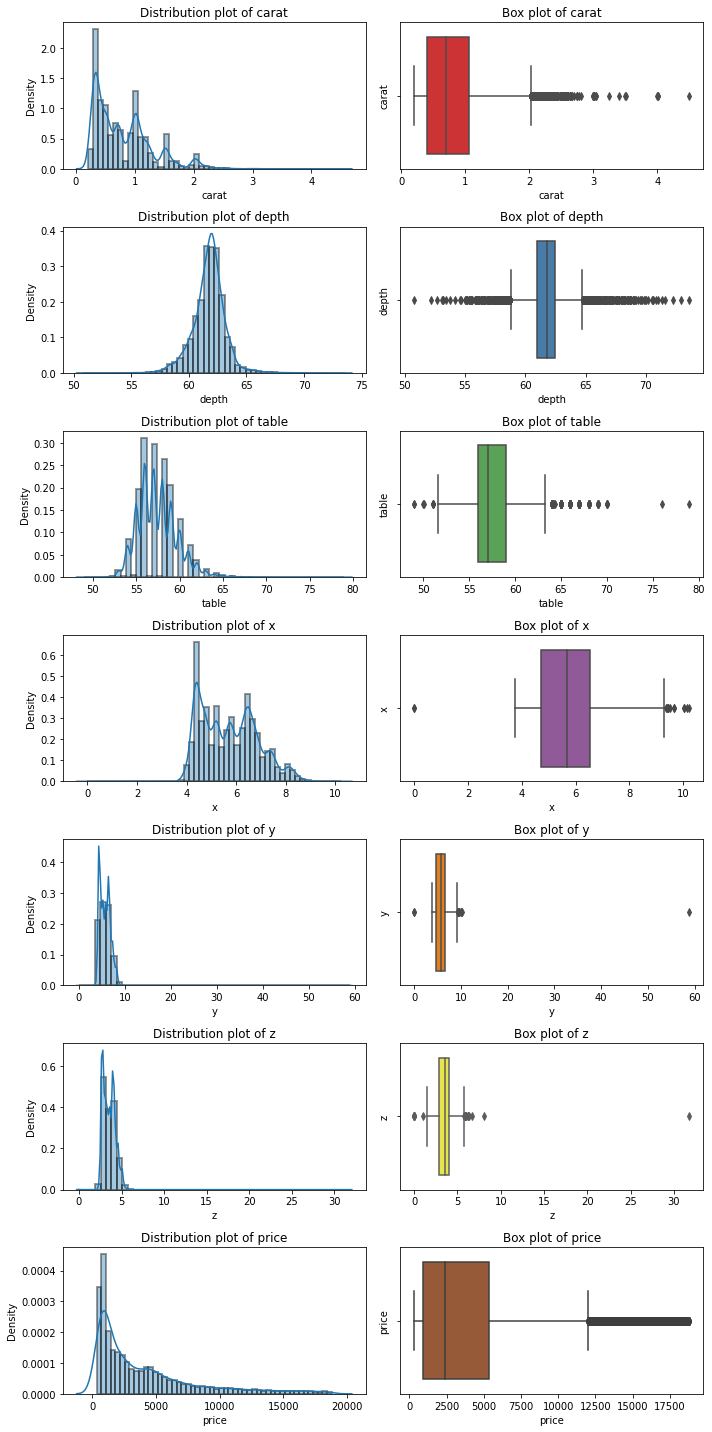

In [ ]:
# Distribution and boxplots of the variables

a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list1 = zirc_df.select_dtypes(['float64', 'int64']).columns.to_list()

palette1 = itertools.cycle(sns.color_palette(palette='Set1'))

fig1 = plt.figure(figsize=(10,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(zirc_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = zirc_df[i], orient='h', palette=palette1)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
#Outlier detection from Interquartile range (IQR) in duplicate removed data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

for i in col_list1:
    Q1 = zirc_df[i].quantile(q=0.25)
    Q3 = zirc_df[i].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in {}: {}'.format(i, L_outliers))
    print('Upper outliers in {}: {}'.format(i, U_outliers),'\n')
    print('Number of outliers in {} upper: {}'.format(i, zirc_df[zirc_df[i]>U_outliers][i].count()))
    print('Number of outliers in {} lower: {}'.format(i, zirc_df[zirc_df[i]<L_outliers][i].count()),'\n')
    print('% of Outlier in {} upper: {}%'.format(i, round(zirc_df[zirc_df[i]>U_outliers][i].count()*100/len(zirc_df),2)))
    print('% of Outlier in {} lower: {}%'.format(i, round(zirc_df[zirc_df[i]<L_outliers][i].count()*100/len(zirc_df),2)),'\n')
    print('###########################################', '\n')

Lower outliers in carat: -0.5750000000000001
Upper outliers in carat: 2.0250000000000004 

Number of outliers in carat upper: 657
Number of outliers in carat lower: 0 

% of Outlier in carat upper: 2.44%
% of Outlier in carat lower: 0.0% 

########################################### 

Lower outliers in depth: 58.75
Upper outliers in depth: 64.75 

Number of outliers in depth upper: 486
Number of outliers in depth lower: 733 

% of Outlier in depth upper: 1.8%
% of Outlier in depth lower: 2.72% 

########################################### 

Lower outliers in table: 51.5
Upper outliers in table: 63.5 

Number of outliers in table upper: 310
Number of outliers in table lower: 8 

% of Outlier in table upper: 1.15%
% of Outlier in table lower: 0.03% 

########################################### 

Lower outliers in x: 1.9500000000000002
Upper outliers in x: 9.309999999999999 

Number of outliers in x upper: 12
Number of outliers in x lower: 2 

% of Outlier in x upper: 0.04%
% of Outlier i

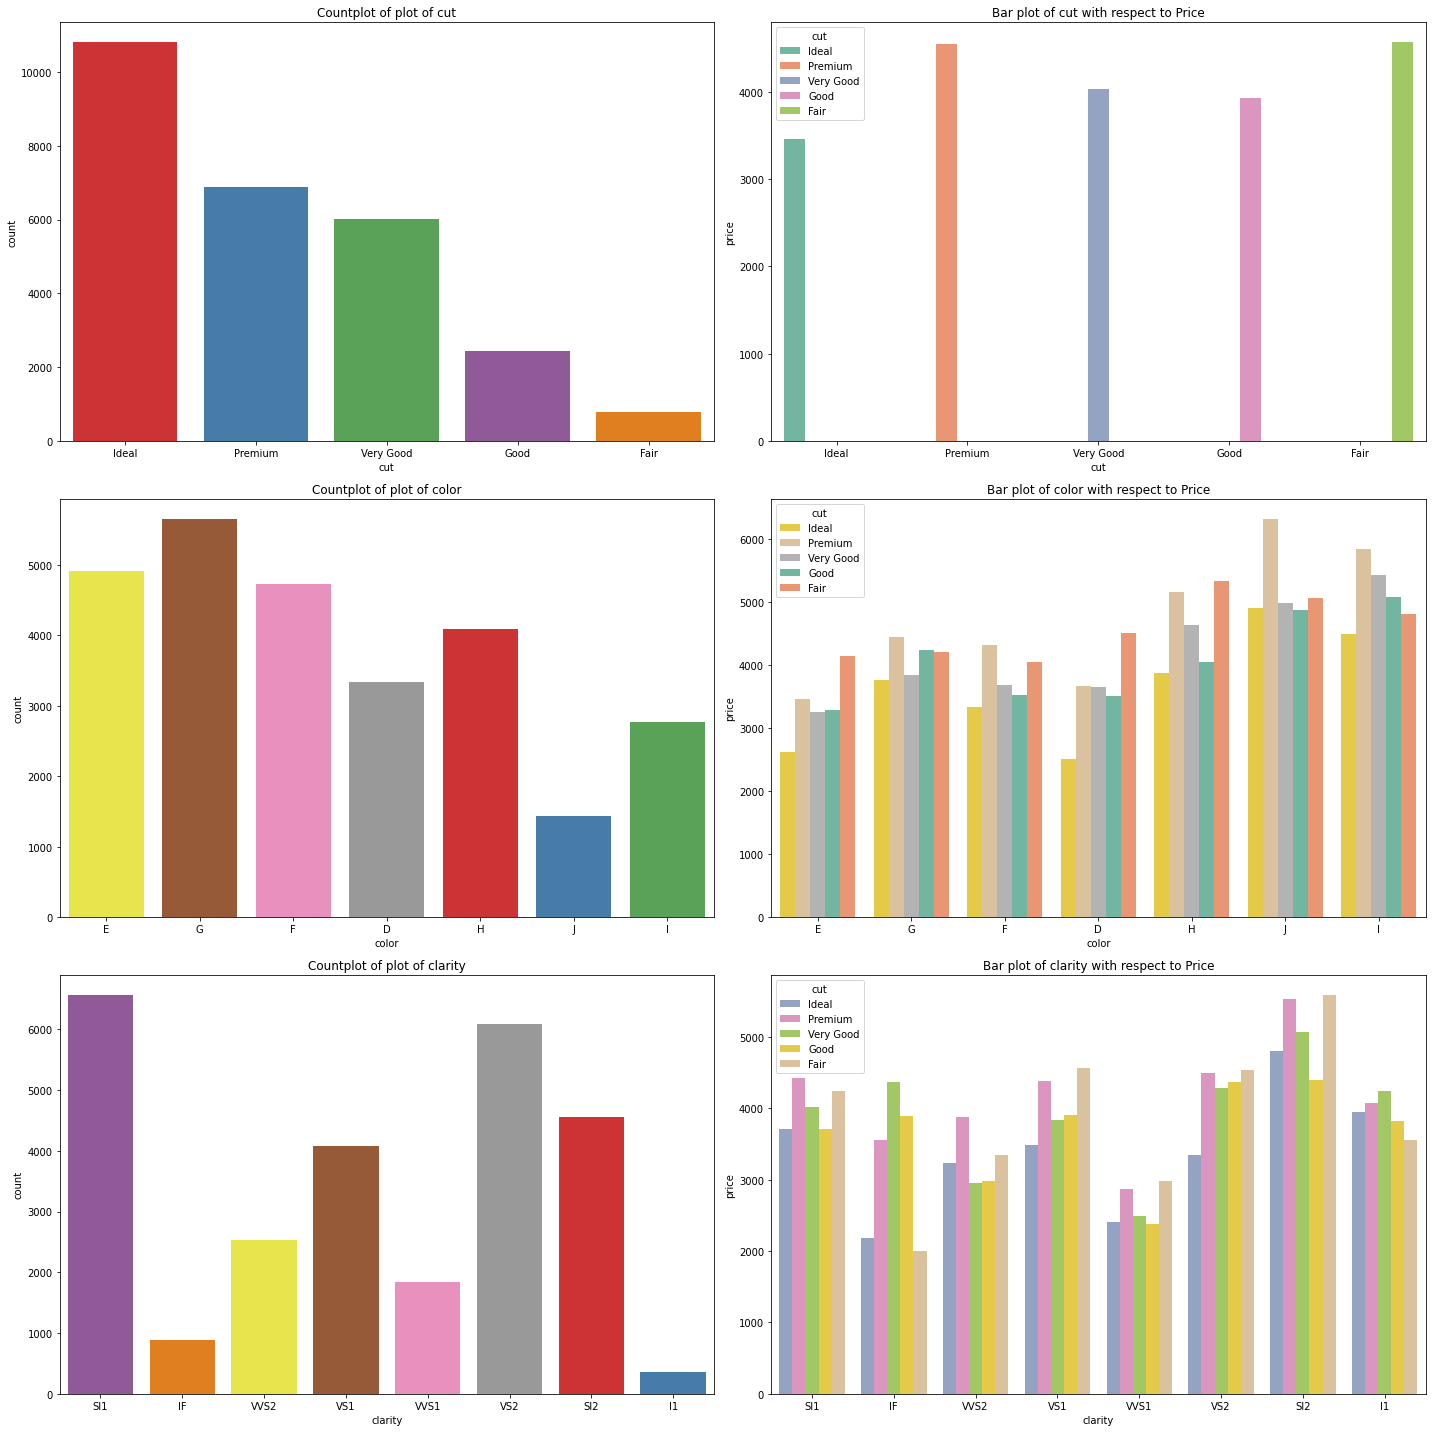

In [ ]:
#Bar plots of the categorical variables

a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list2 = zirc_df.select_dtypes(['object']).columns.to_list()

palette1 = itertools.cycle(sns.color_palette(palette='Set1'))

palette2 = itertools.cycle(sns.color_palette(palette='Set2'))

fig3 = plt.figure(figsize=(20,20))

for i in col_list2:
    plt.subplot(a, b, c)
    plt.title('Countplot of plot of {}'.format(i))
    plt.xlabel(i)
    sns.countplot(data = zirc_df, x = zirc_df[i], palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Bar plot of {} with respect to Price'.format(i))
    plt.xlabel(i)
    plt.ylabel('Price')
    sns.barplot(data = zirc_df, x=zirc_df[i],y='price', hue='cut', ci=None, palette=palette2);
    c = c + 1

plt.tight_layout()
plt.show()

### Bi-Variate Analysis

<Figure size 720x720 with 0 Axes>

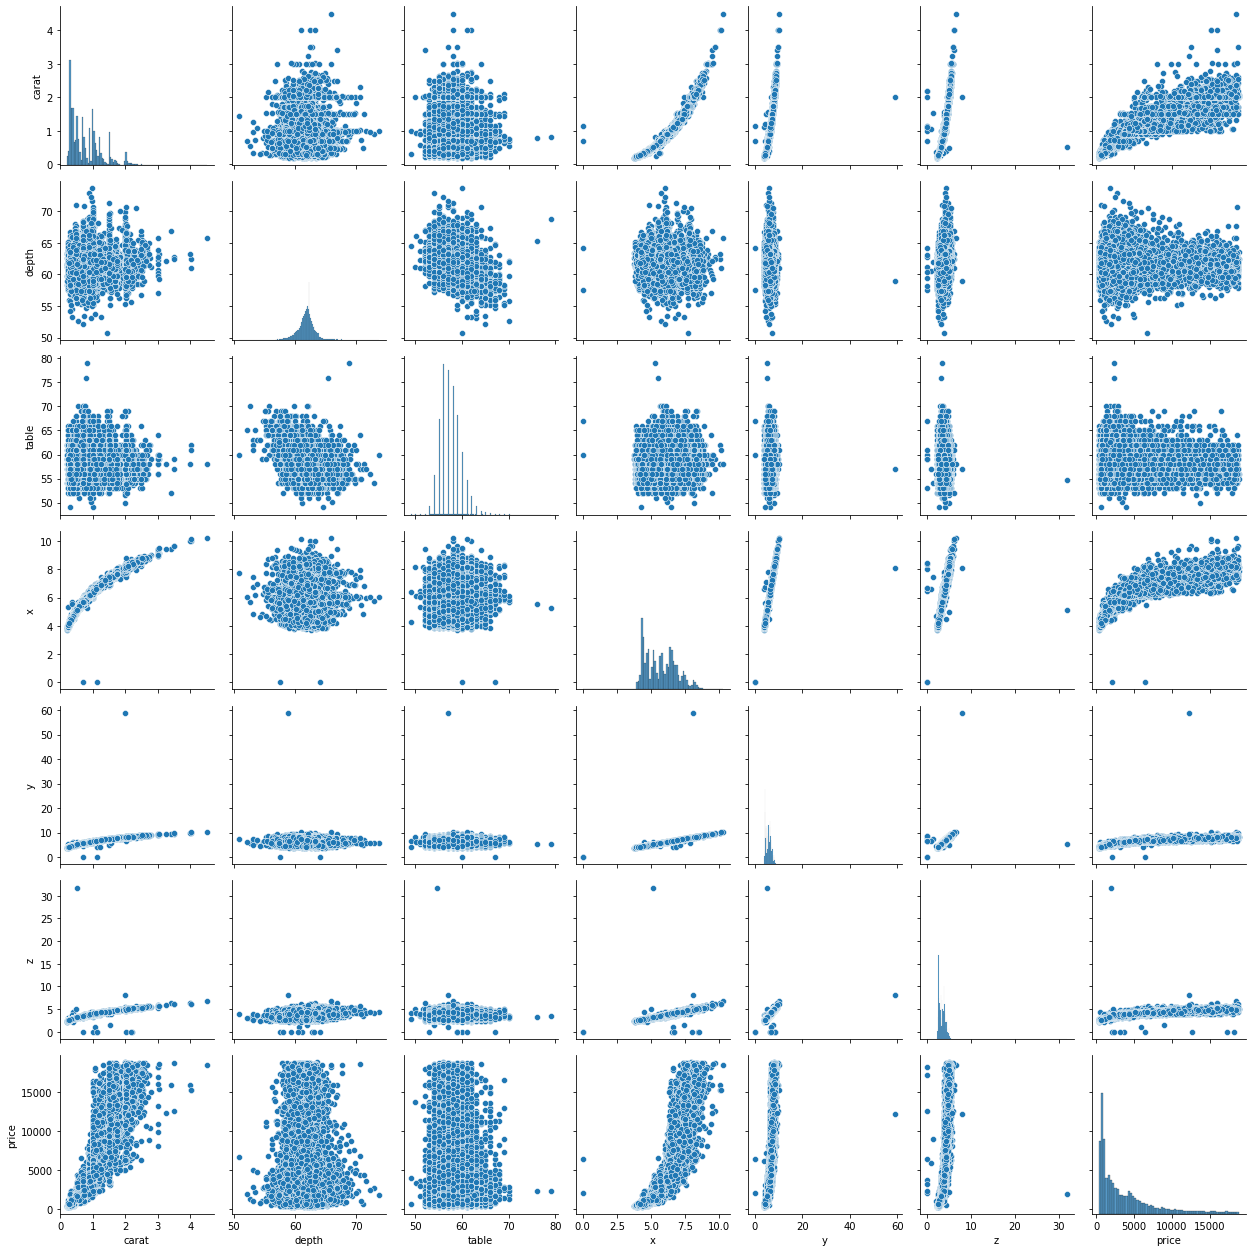

In [ ]:
# Pair plot of the numerical variables
fig4 = plt.figure(figsize=(10,10))
sns.pairplot(data=zirc_df[col_list1], palette='Set1')
plt.tight_layout()
plt.show()

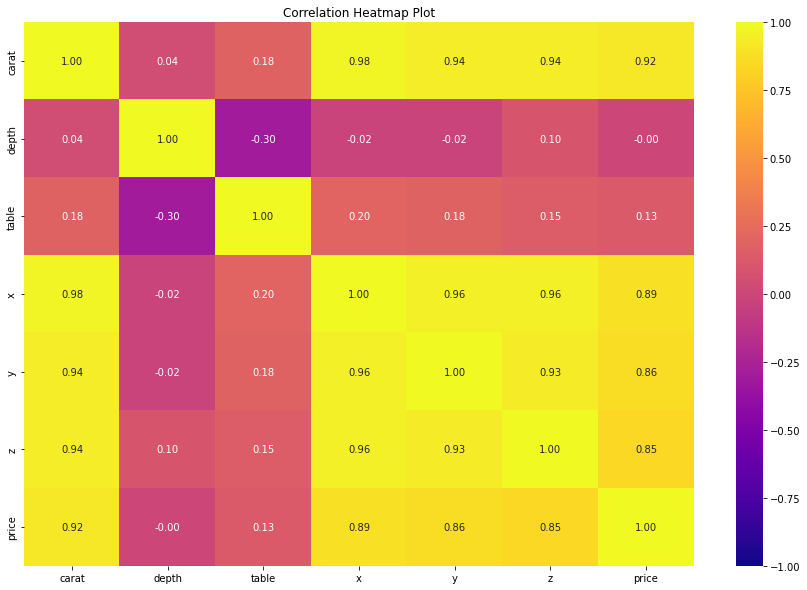

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(zirc_df.corr(),2),fmt='.2f',annot=True,cmap='plasma', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [ ]:
zirc_df[zirc_df.isnull().any(axis=1)].head()

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340


In [ ]:
zirc_df[zirc_df.isnull().any(axis=1)].groupby('cut').count()

,carat,color,clarity,depth,table,x,y,z,price
cut,,,,,,,,,
Fair,24,24,24,0,24,24,24,24,24
Good,59,59,59,0,59,59,59,59,59
Ideal,270,270,270,0,270,270,270,270,270
Premium,192,192,192,0,192,192,192,192,192
Very Good,152,152,152,0,152,152,152,152,152


In [ ]:
# Missing values treatment

zirc_df['depth'].fillna(zirc_df['depth'].mean(), inplace=True)

In [ ]:
zirc_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
zirc_df.loc[zirc_df.values==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381


In [ ]:
# Shape check before removing rows containing zeros
print(f'Shape of the dataset before removing rows containing zeros{zirc_df.shape}')

Shape of the dataset before removing rows containing zeros(26933, 10)


In [ ]:
zirc_df.drop(index=[5821,6034,10827,12498,12689,17506,18194,23758], axis=0, inplace=True)

In [ ]:
# Shape check after removing rows containing zeros
print(f'Shape of the dataset after removing duplicates{zirc_df.shape}')

Shape of the dataset after removing duplicates(26925, 10)


In [ ]:
zirc_df.loc[(zirc_df['x']==0) | (zirc_df['y']==0) | (zirc_df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [ ]:
zirc_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### **Outlier Removal**

In [ ]:
def remove_outlier(col):
    sorted(col)
    #Q1,Q3=np.percentile(col,[25,75])
    Q1 = col.quantile(q=0.25)
    Q3 = col.quantile(q=0.75)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in zirc_df[col_list1].columns:
    lr,ur=remove_outlier(zirc_df[column])
    zirc_df[column]=np.where(zirc_df[column]>ur,ur,zirc_df[column])
    zirc_df[column]=np.where(zirc_df[column]<lr,lr,zirc_df[column])

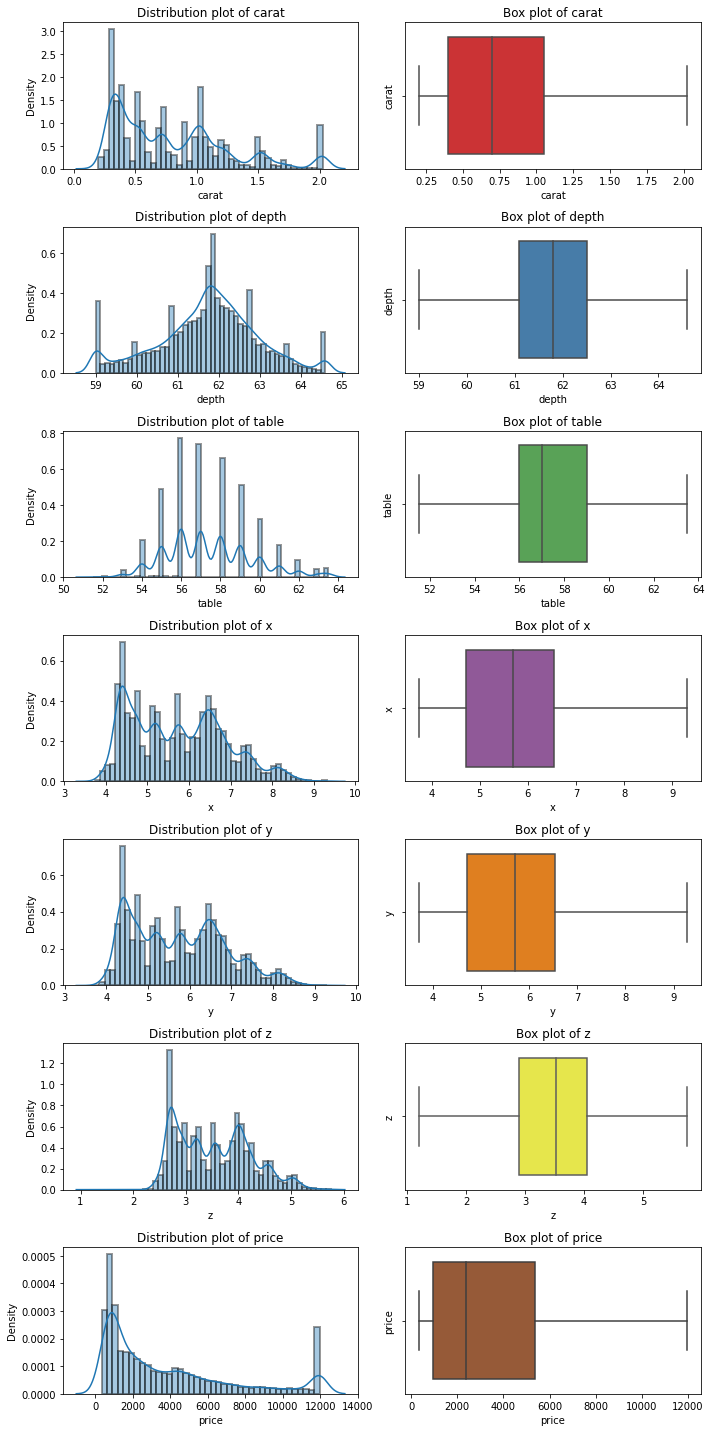

In [ ]:
# Distribution and boxplots of the variables

a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list1 = zirc_df.select_dtypes(['float64', 'int64']).columns.to_list()

palette1 = itertools.cycle(sns.color_palette(palette='Set1'))

fig1 = plt.figure(figsize=(10,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(zirc_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = zirc_df[i], orient='h', palette=palette1)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
zirc_df.groupby('cut').count()

,carat,color,clarity,depth,table,x,y,z,price
cut,,,,,,,,,
Fair,779,779,779,779,779,779,779,779,779
Good,2434,2434,2434,2434,2434,2434,2434,2434,2434
Ideal,10805,10805,10805,10805,10805,10805,10805,10805,10805
Premium,6880,6880,6880,6880,6880,6880,6880,6880,6880
Very Good,6027,6027,6027,6027,6027,6027,6027,6027,6027


In [ ]:
zirc_df.groupby('color').count()

,carat,cut,clarity,depth,table,x,y,z,price
color,,,,,,,,,
D,3341,3341,3341,3341,3341,3341,3341,3341,3341
E,4916,4916,4916,4916,4916,4916,4916,4916,4916
F,4722,4722,4722,4722,4722,4722,4722,4722,4722
G,5650,5650,5650,5650,5650,5650,5650,5650,5650
H,4091,4091,4091,4091,4091,4091,4091,4091,4091
I,2765,2765,2765,2765,2765,2765,2765,2765,2765
J,1440,1440,1440,1440,1440,1440,1440,1440,1440


In [ ]:
zirc_df.groupby('clarity').count()

,carat,cut,color,depth,table,x,y,z,price
clarity,,,,,,,,,
I1,362,362,362,362,362,362,362,362,362
IF,891,891,891,891,891,891,891,891,891
SI1,6564,6564,6564,6564,6564,6564,6564,6564,6564
SI2,4561,4561,4561,4561,4561,4561,4561,4561,4561
VS1,4086,4086,4086,4086,4086,4086,4086,4086,4086
VS2,6092,6092,6092,6092,6092,6092,6092,6092,6092
VVS1,1839,1839,1839,1839,1839,1839,1839,1839,1839
VVS2,2530,2530,2530,2530,2530,2530,2530,2530,2530


In [ ]:
zirc_df['clarity'].value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [ ]:
zirc_df['clarity'] = zirc_df['clarity'].replace({'SI1': 'SI', 'SI2':'SI', 'VS1': 'VS', 'VS2':'VS', 'VVS1':'VVS', 'VVS2':'VVS'})
zirc_df['clarity'].value_counts()

SI     11125
VS     10178
VVS     4369
IF       891
I1       362
Name: clarity, dtype: int64

In [ ]:
zirc_df.groupby('clarity').count()

,carat,cut,color,depth,table,x,y,z,price
clarity,,,,,,,,,
I1,362,362,362,362,362,362,362,362,362
IF,891,891,891,891,891,891,891,891,891
SI,11125,11125,11125,11125,11125,11125,11125,11125,11125
VS,10178,10178,10178,10178,10178,10178,10178,10178,10178
VVS,4369,4369,4369,4369,4369,4369,4369,4369,4369


In [ ]:
# Create a logarithm of price column for future model
zirc_df['log_price'] = np.log10(zirc_df['price'])
zirc_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,0.30,Ideal,E,SI,62.1,58.0,4.27,4.29,2.66,499.0,2.698101
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0,2.992995
2,0.90,Very Good,E,VVS,62.2,60.0,6.04,6.12,3.78,6289.0,3.798582
3,0.42,Ideal,F,VS,61.6,56.0,4.82,4.80,2.96,1082.0,3.034227
4,0.31,Ideal,F,VVS,60.4,59.0,4.35,4.43,2.65,779.0,2.891537


### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [ ]:
for feature in col_list2: 
    print('\n')
    print('Feature:',feature)
    print(pd.Categorical(zirc_df[feature].unique()))
    print(pd.Categorical(zirc_df[feature].unique()).codes)
    zirc_df[feature] = pd.Categorical(zirc_df[feature]).codes



Feature: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


Feature: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


Feature: clarity
['SI', 'IF', 'VVS', 'VS', 'I1']
Categories (5, object): ['I1', 'IF', 'SI', 'VS', 'VVS']
[2 1 4 3 0]


In [ ]:
zirc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      26925 non-null  float64
 1   cut        26925 non-null  int8   
 2   color      26925 non-null  int8   
 3   clarity    26925 non-null  int8   
 4   depth      26925 non-null  float64
 5   table      26925 non-null  float64
 6   x          26925 non-null  float64
 7   y          26925 non-null  float64
 8   z          26925 non-null  float64
 9   price      26925 non-null  float64
 10  log_price  26925 non-null  float64
dtypes: float64(8), int8(3)
memory usage: 1.9 MB


In [ ]:
zirc_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0,2.698101
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0,2.992995
2,0.90,4,1,4,62.2,60.0,6.04,6.12,3.78,6289.0,3.798582
3,0.42,2,2,3,61.6,56.0,4.82,4.80,2.96,1082.0,3.034227
4,0.31,2,2,4,60.4,59.0,4.35,4.43,2.65,779.0,2.891537


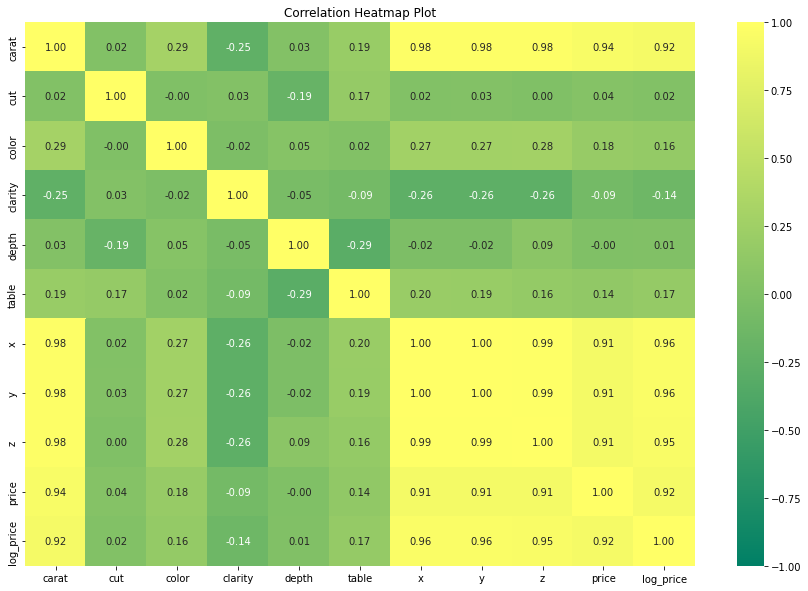

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(zirc_df.corr(),2),fmt='.2f',annot=True,cmap='summer', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

In [ ]:
zirc_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'log_price'],
      dtype='object')

#### **Train-Test Split**

In [ ]:
X = zirc_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = zirc_df.pop('price')
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,4,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,3,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,4,60.4,59.0,4.35,4.43,2.65


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18847, 9)
X_test (8078, 9)
y_train (18847,)
y_test (8078,)


In [ ]:
X_log = zirc_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y_log = zirc_df.pop('log_price')
X_log.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,4,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,3,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,4,60.4,59.0,4.35,4.43,2.65


In [ ]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=.30, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18847, 9)
X_test (8078, 9)
y_train (18847,)
y_test (8078,)


#### **Build Linear Model**

##### Using Scikit-Learn

In [ ]:
#Instantiate the Linear regression model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, lin_reg_model1.coef_[idx]))

The coefficient for carat is 9294.73077103902
The coefficient for cut is 32.50451958852386
The coefficient for color is -234.3195347431928
The coefficient for clarity is 607.0595823411263
The coefficient for depth is -47.66686068127947
The coefficient for table is -73.36960184491045
The coefficient for x is -1831.4058817641917
The coefficient for y is 1726.2669699170833
The coefficient for z is -935.8862856126357


In [ ]:
# Let us check the intercept for the model

intercept1 = lin_reg_model1.intercept_

print("The intercept for our model is {}".format(intercept1))

The intercept for our model is 6353.697242567165


In [ ]:
# R square on training data
lin_reg_model1.score(X_train, y_train)

0.9141634638098214

In [ ]:
#display adjusted R-squared
adj_R2_lrm1 = 1 - (1-lin_reg_model1.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_R2_lrm1

0.9141224525646278

In [ ]:
# Predict on the train data

y_train_pred = lin_reg_model1.predict(X_train)

In [ ]:
# R square on training data
r2_score(y_train, y_train_pred)

0.9141634638098214

In [ ]:
# MSE & RMSE

print('The MSE for the train data is: {}'.format(mean_squared_error(y_train,y_train_pred)))
print('The RMSE for the train data is: {}'.format(mean_squared_error(y_train,y_train_pred, squared=False)))

The MSE for the train data is: 1026558.0792061876
The RMSE for the train data is: 1013.19202484336


In [ ]:
# R square on testing data
lin_reg_model1.score(X_test, y_test)

0.9173984759759012

In [ ]:
# Predict on the test data

y_test_pred = lin_reg_model1.predict(X_test)

In [ ]:
# R square on training data
r2_score(y_test,y_test_pred)

0.9173984759759012

In [ ]:
#display adjusted R-squared
adj_R2_lrm1 = 1 - (1-lin_reg_model1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_R2_lrm1

0.9173063324810801

In [ ]:
# MSE & RMSE

print('The MSE for the test data is: {}'.format(mean_squared_error(y_test,y_test_pred)))
print('The RMSE for the test data is: {}'.format(mean_squared_error(y_test,y_test_pred, squared=False)))

The MSE for the test data is: 1003266.9530030364
The RMSE for the test data is: 1001.6321445535963


In [ ]:
#Instantiate the Linear regression model - log price
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_log_train, y_log_train)

LinearRegression()

In [ ]:
for idx,col in enumerate(X_log_train.columns):
    print("The coefficient for {} is {}".format(col, lin_reg_model2.coef_[idx]))

The coefficient for carat is -0.5479873022877674
The coefficient for cut is -0.0004318779931077321
The coefficient for color is -0.028349943286314225
The coefficient for clarity is 0.06390860053544418
The coefficient for depth is 0.012257081971088227
The coefficient for table is -0.0012960624550670957
The coefficient for x is 0.23792061171201456
The coefficient for y is 0.27209801552633933
The coefficient for z is 0.17213365622846705


In [ ]:
# Let us check the intercept for the model

intercept2 = lin_reg_model2.intercept_

print("The intercept for our model is {}".format(intercept2))

The intercept for our model is -0.5000279150235625


In [ ]:
# R square on training data
lin_reg_model2.score(X_log_train, y_log_train)

0.9543975025044731

In [ ]:
#display adjusted R-squared
adj_R2_lrm2 = 1 - (1-lin_reg_model2.score(X_log_train, y_log_train))*(len(y_log_train)-1)/(len(y_log_train)-X_log_train.shape[1]-1)
adj_R2_lrm2

0.9543757144024685

In [ ]:
# Predict on the train data

y_log_train_pred = lin_reg_model2.predict(X_log_train)

In [ ]:
# R square on training data
r2_score(y_log_train,y_log_train_pred)

0.9543975025044731

In [ ]:
# MSE & RMSE

print('The MSE for the train data is: {}'.format(mean_squared_error(y_log_train,y_log_train_pred)))
print('The RMSE for the train data is: {}'.format(mean_squared_error(y_log_train,y_log_train_pred, squared=False)))

The MSE for the train data is: 0.008447133877357741
The RMSE for the train data is: 0.09190829058010894


In [ ]:
# R square on training data
lin_reg_model2.score(X_log_test, y_log_test)

0.9560807019486487

In [ ]:
#display adjusted R-squared
adj_R2_lrm2 = 1 - (1-lin_reg_model2.score(X_log_test, y_log_test))*(len(y_log_test)-1)/(len(y_log_test)-X_log_test.shape[1]-1)
adj_R2_lrm2

0.9560317091769008

In [ ]:
# Predict on the train data

y_log_test_pred = lin_reg_model2.predict(X_log_test)

In [ ]:
# MSE & RMSE

print('The MSE for the test data is: {}'.format(mean_squared_error(y_log_test,y_log_test_pred)))
print('The RMSE for the test data is: {}'.format(mean_squared_error(y_log_test,y_log_test_pred, squared=False)))

The MSE for the test data is: 0.008299106941568246
The RMSE for the test data is: 0.09109943436469979


In [ ]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [ ]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.65234441392657
cut ---> 7.67844284592093
color ---> 3.674363107235964
clarity ---> 11.880612563601703
depth ---> 1012.4845504294435
table ---> 730.7134388388338
x ---> 10366.373738144326
y ---> 9487.938106907855
z ---> 2816.1219299867093


In [ ]:
vif_log = [variance_inflation_factor(X_log.values, ix) for ix in range(X_log.shape[1])]

In [ ]:
i=0
for column in X_log.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.65234441392657
cut ---> 7.67844284592093
color ---> 3.674363107235964
clarity ---> 11.880612563601703
depth ---> 1012.4845504294435
table ---> 730.7134388388338
x ---> 10366.373738144326
y ---> 9487.938106907855
z ---> 2816.1219299867093


##### Using Statsmodel

In [ ]:
# This adds the constant term beta to the Simple Linear Regression.
X_con=sm.add_constant(X)

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.30, random_state=1)

In [ ]:
lin_reg_model3 = sm.OLS(y_trainc,X_trainc).fit()
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:04:37   Log-Likelihood:            -1.5718e+05
No. Observations:               18847   AIC:                         3.144e+05
Df Residuals:                   18837   BIC:                         3.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6353.6972    827.275      7.680      0.000    4732.164    7975.230
carat       9294.7308     92.035    100.991      0.000    9114.333    9475.128
cut           32.5045      7.451      4.362      0.000      17.899      47.110
color       -234.3195      4.550    -51.494      0.000    -243.239    -225.400
clarity      607.0596      9.211     65.905      0.000     589.005     625.114
depth        -47.6669     12.090     -3.943      0.000     -71.365     -23.969
table        -73.3696      3.733    -19.655      0.000     -80.686     -66.053
x          -1831.4059    150.769    -12.147      0.000   -2126.928   -1535.884
y           1726.2670    148.490     11.625      0.000    1435.214    2017.320
z           -935.8863    155.390     -6.023      0.000   -1240.466    -631.307
==============================================================================
Omnibus:                     5947.874   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31819.544
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                       8.694   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
for i,j in np.array(lin_reg_model3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(6353.7) * const + (9294.73) * carat + (32.5) * cut + (-234.32) * color + (607.06) * clarity + (-47.67) * depth + (-73.37) * table + (-1831.41) * x + (1726.27) * y + (-935.89) * z + 

In [ ]:
print('The MSE for the train data using stats model is:', lin_reg_model3.mse_resid)
print('The RMSE for the train data using stats model is:', math.sqrt(lin_reg_model3.mse_resid))

The MSE for the train data using stats model is: 1027103.0481923356
The RMSE for the train data using stats model is: 1013.4609258340134


In [ ]:
# R square on training data
lin_reg_model3.rsquared

0.9141634638098214

In [ ]:
# Adj R square on training data
lin_reg_model3.rsquared_adj

0.9141224525646278

In [ ]:
# Predict on the train data

y_trainc_pred = lin_reg_model3.predict(X_trainc)

In [ ]:
# MSE & RMSE

print('The MSE for the train data is: {}'.format(mean_squared_error(y_trainc,y_trainc_pred)))
print('The RMSE for the train data is: {}'.format(mean_squared_error(y_trainc,y_trainc_pred, squared=False)))

The MSE for the train data is: 1026558.0792061879
The RMSE for the train data is: 1013.1920248433601


In [ ]:
# Predict on the test data

y_testc_pred = lin_reg_model3.predict(X_testc)

In [ ]:
lin_reg_model4 = sm.OLS(y_testc,X_testc).fit()
lin_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.000e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:47:05   Log-Likelihood:                -67259.
No. Observations:                8078   AIC:                         1.345e+05
Df Residuals:                    8068   BIC:                         1.346e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1015.8705   1383.042      0.735      0.463   -1695.249    3726.990
carat       9094.0350    135.958     66.888      0.000    8827.521    9360.549
cut           56.5447     11.209      5.045      0.000      34.573      78.516
color       -238.8789      6.830    -34.973      0.000    -252.268    -225.489
clarity      620.2116     13.911     44.586      0.000     592.943     647.480
depth         23.6233     20.732      1.139      0.255     -17.016      64.263
table        -62.6279      5.595    -11.194      0.000     -73.595     -51.660
x          -1071.2727    171.488     -6.247      0.000   -1407.434    -735.111
y           1592.8666    171.140      9.307      0.000    1257.387    1928.346
z          -1840.1879    278.414     -6.610      0.000   -2385.950   -1294.425
==============================================================================
Omnibus:                     2266.467   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11379.832
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       8.236   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# MSE & RMSE

print('The MSE for the test data is: {}'.format(mean_squared_error(y_testc,y_testc_pred)))
print('The RMSE for the test data is: {}'.format(mean_squared_error(y_testc,y_testc_pred, squared=False)))

The MSE for the test data is: 1003266.9530030367
The RMSE for the test data is: 1001.6321445535964


In [ ]:
# This adds the constant term beta to the Simple Linear Regression.
X_log_con=sm.add_constant(X_log)

In [ ]:
X_log_trainc, X_log_testc, y_log_trainc, y_log_testc = train_test_split(X_log_con, y_log, test_size=0.30, random_state=1)

In [ ]:
lin_reg_model4 = sm.OLS(y_log_trainc,X_log_trainc).fit()
lin_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 4.380e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:10:10   Log-Likelihood:                 18244.
No. Observations:               18847   AIC:                        -3.647e+04
Df Residuals:                   18837   BIC:                        -3.639e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5000      0.075     -6.663      0.000      -0.647      -0.353
carat         -0.5480      0.008    -65.638      0.000      -0.564      -0.532
cut           -0.0004      0.001     -0.639      0.523      -0.002       0.001
color         -0.0283      0.000    -68.680      0.000      -0.029      -0.028
clarity        0.0639      0.001     76.486      0.000       0.062       0.066
depth          0.0123      0.001     11.176      0.000       0.010       0.014
table         -0.0013      0.000     -3.828      0.000      -0.002      -0.001
x              0.2379      0.014     17.396      0.000       0.211       0.265
y              0.2721      0.013     20.201      0.000       0.246       0.298
z              0.1721      0.014     12.212      0.000       0.145       0.200
==============================================================================
Omnibus:                     2199.775   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14973.558
Skew:                           0.349   Prob(JB):                         0.00
Kurtosis:                       7.311   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
for i,j in np.array(lin_reg_model4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.5) * const + (-0.55) * carat + (-0.0) * cut + (-0.03) * color + (0.06) * clarity + (0.01) * depth + (-0.0) * table + (0.24) * x + (0.27) * y + (0.17) * z + 

In [ ]:
print('The MSE for the train data using stats model is:', lin_reg_model4.mse_resid)
print('The RMSE for the train data using stats model is:', math.sqrt(lin_reg_model4.mse_resid))

The MSE for the train data using stats model is: 0.00845161820813088
The RMSE for the train data using stats model is: 0.09193268302475938


In [ ]:
# Predict on the train data

y_log_trainc_pred = lin_reg_model4.predict(X_log_trainc)

In [ ]:
lin_reg_model5 = sm.OLS(y_log_testc,X_log_testc).fit()
lin_reg_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.993e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:22:49   Log-Likelihood:                 7971.9
No. Observations:                8078   AIC:                        -1.592e+04
Df Residuals:                    8068   BIC:                        -1.585e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4994      0.125     -4.002      0.000      -0.744      -0.255
carat         -0.5651      0.012    -46.060      0.000      -0.589      -0.541
cut            0.0044      0.001      4.323      0.000       0.002       0.006
color         -0.0284      0.001    -46.014      0.000      -0.030      -0.027
clarity        0.0671      0.001     53.463      0.000       0.065       0.070
depth          0.0118      0.002      6.292      0.000       0.008       0.015
table         -0.0015      0.001     -3.005      0.003      -0.003      -0.001
x              0.3895      0.015     25.169      0.000       0.359       0.420
y              0.1074      0.015      6.955      0.000       0.077       0.138
z              0.2035      0.025      8.098      0.000       0.154       0.253
==============================================================================
Omnibus:                      982.448   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9056.032
Skew:                           0.227   Prob(JB):                         0.00
Kurtosis:                       8.167   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('The MSE for the train data using stats model is:', lin_reg_model5.mse_resid)
print('The RMSE for the train data using stats model is:', math.sqrt(lin_reg_model5.mse_resid))

The MSE for the train data using stats model is: 0.0081448807293683
The RMSE for the train data using stats model is: 0.0902489929548707


In [ ]:
# Predict on the train data

y_log_testc_pred = lin_reg_model4.predict(X_log_testc)

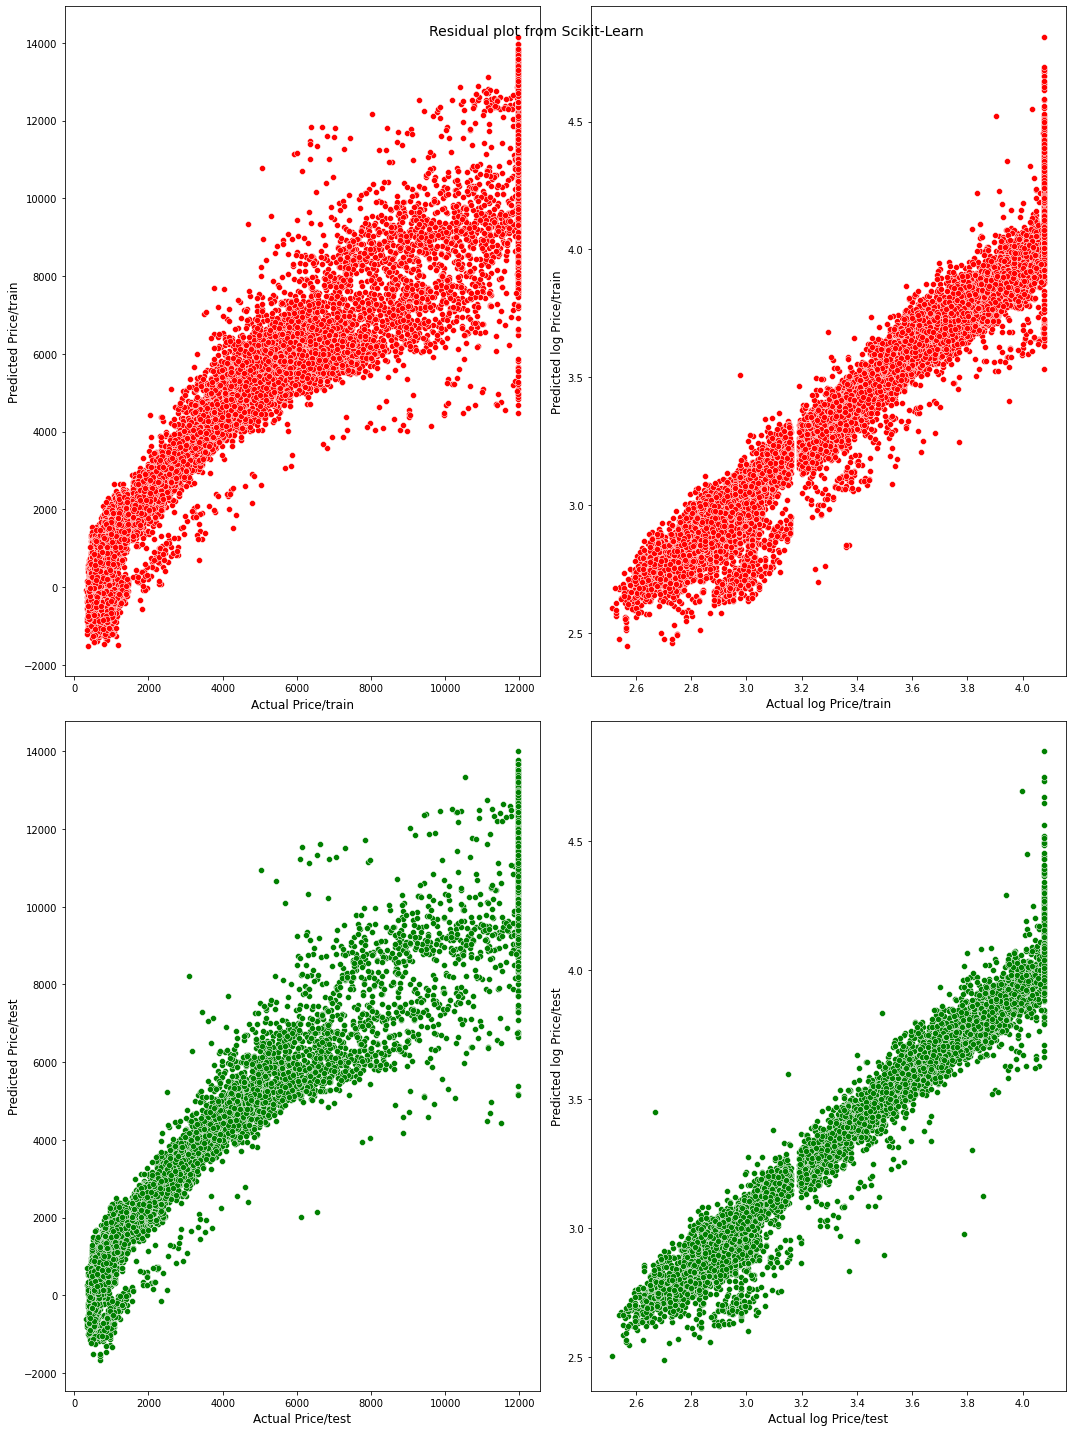

In [ ]:
fig1, axes1 = plt.subplots(nrows=2,ncols=2)
fig1.set_size_inches(15, 20)

a1 = sns.scatterplot(x=y_train, y = y_train_pred, ax=axes1[0,0], color='R');
a1.set_xlabel('Actual Price/train', size=12);
a1.set_ylabel('Predicted Price/train', size=12);
#a1.sub('Predicted Price vs. Actual Price for the train set from Scikit-Learn', size=14)


b1 = sns.scatterplot(x=y_log_train, y = y_log_train_pred, ax=axes1[0,1], color='R');
b1.set_xlabel('Actual log Price/train', size=12);
b1.set_ylabel('Predicted log Price/train', size=12);
#b1.title('Predicted log Price vs. Actual log Price for the train set from Scikit-Learn', size=14)

a1 = sns.scatterplot(x=y_test, y = y_test_pred, ax=axes1[1,0], color='G');
a1.set_xlabel('Actual Price/test', size=12);
a1.set_ylabel('Predicted Price/test', size=12);
#a1.title('Predicted Price vs. Actual Price for the test set from Scikit-Learn', size=14)

b1 = sns.scatterplot(x=y_log_test, y = y_log_test_pred, ax=axes1[1,1], color='G');
b1.set_xlabel('Actual log Price/test', size=12);
b1.set_ylabel('Predicted log Price/test', size=12);
#b1.title('Predicted log Price vs. Actual log Price for the test set from Scikit-Learn', size=14)

plt.suptitle('Residual plot from Scikit-Learn', size=14)
plt.tight_layout()
plt.show()

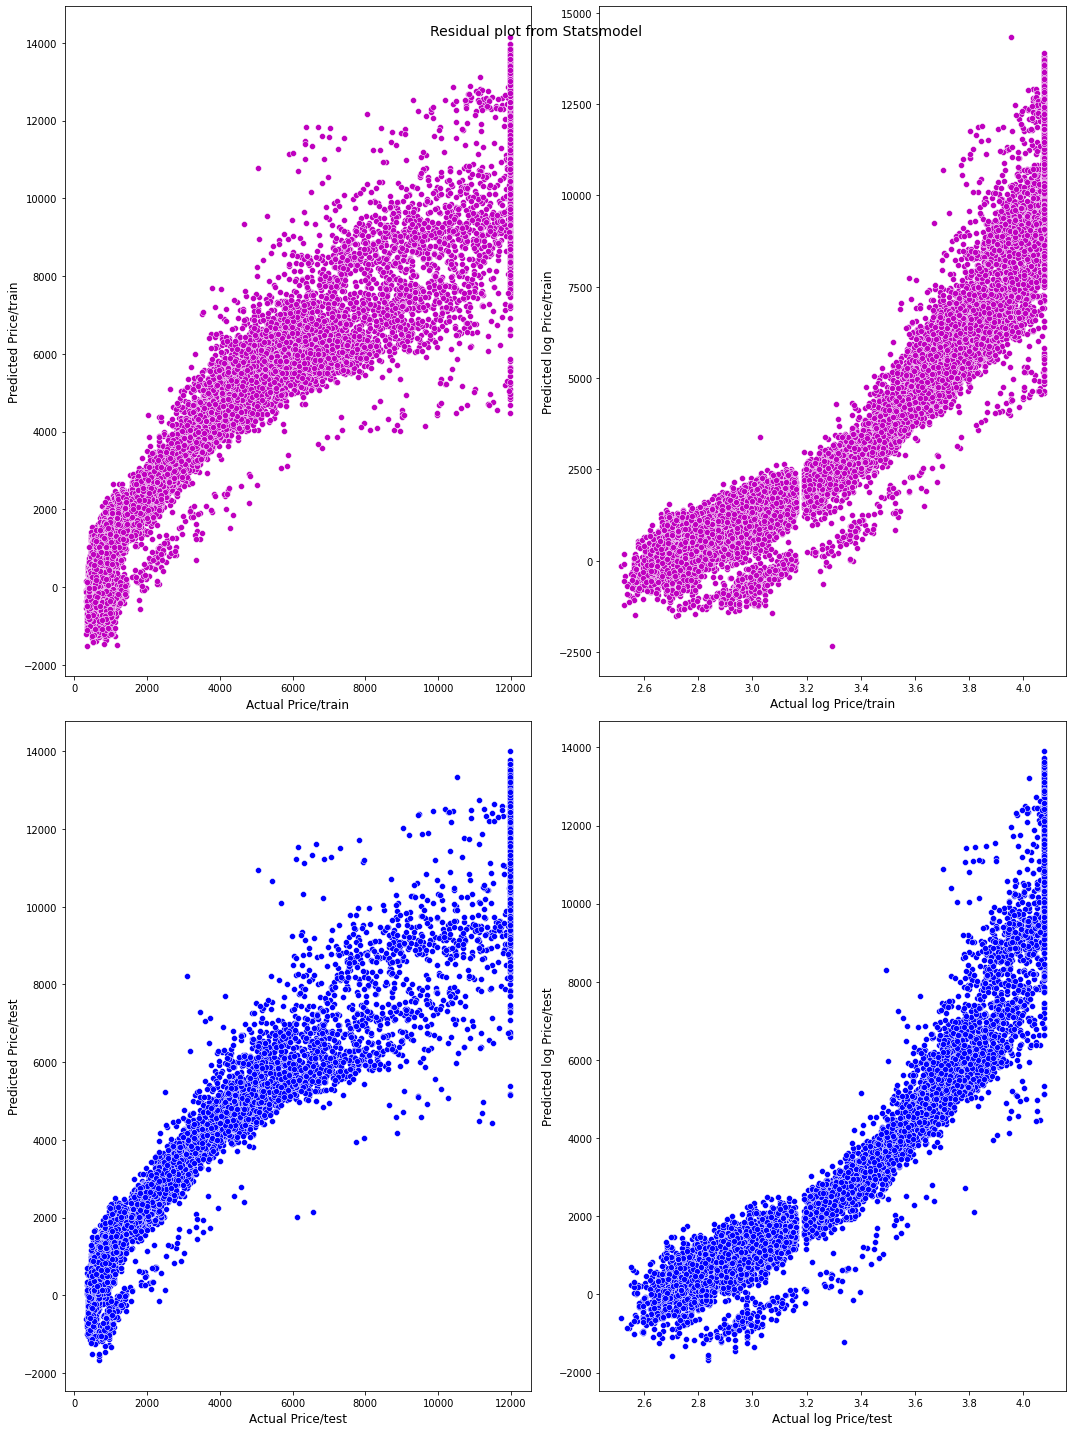

In [ ]:
fig1, axes1 = plt.subplots(nrows=2,ncols=2)
fig1.set_size_inches(15, 20)

a1 = sns.scatterplot(x=y_trainc, y = y_trainc_pred, ax=axes1[0,0], color='M');
a1.set_xlabel('Actual Price/train', size=12);
a1.set_ylabel('Predicted Price/train', size=12);
#a1.sub('Predicted Price vs. Actual Price for the train set from Statsmodel', size=14)


b1 = sns.scatterplot(x=y_log_trainc, y = y_log_trainc_pred, ax=axes1[0,1], color='M');
b1.set_xlabel('Actual log Price/train', size=12);
b1.set_ylabel('Predicted log Price/train', size=12);
#b1.title('Predicted log Price vs. Actual log Price for the train set from Statsmodel', size=14)

a1 = sns.scatterplot(x=y_testc, y = y_testc_pred, ax=axes1[1,0], color='B');
a1.set_xlabel('Actual Price/test', size=12);
a1.set_ylabel('Predicted Price/test', size=12);
#a1.title('Predicted Price vs. Actual Price for the test set from Statsmodel', size=14)

b1 = sns.scatterplot(x=y_log_testc, y = y_log_testc_pred, ax=axes1[1,1], color='B');
b1.set_xlabel('Actual log Price/test', size=12);
b1.set_ylabel('Predicted log Price/test', size=12);
#b1.title('Predicted log Price vs. Actual log Price for the test set from Statsmodel', size=14)

plt.suptitle('Residual plot from Statsmodel', size=14)
plt.tight_layout()
plt.show()

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

Inference:
we can see that the from the linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

intercept for the model: -3171.950447307667
R square on training data: 0.9311935886926559
R square on testing data: 0.931543712584074
RMSE on Training data: 907.1312415459143
RMSE on Testing data: 911.8447345328436
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

Impact of scaling:
Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

Multi collinearity:
We can observe there are very strong multi collinearity present in the data set.

From statsmodels:
we can see R-squared:0.931 and Adj. R-squared: 0.931 are same. The overall P value is less than alpha.

Finally we can conclude that Best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

When 'carat' increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
When 'cut' increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
When 'color' increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
When 'clarity' increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
When 'y' increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.

we can see the p value is showing 0.449 for depth variable, which is much greater than 0.05. That means this attribute is useless.

There are also some negative co-efficient values, we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient -1417.9089. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

Recommendations:
The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.
To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

As we can see from the model Higher the width('y') of the stone is higher the price.

So the stones having higher width('y') should consider in higher profitable stones.
The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones.

As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.

So higher the Length('x') of the stone are lower is the profitability.
higher the 'z' i.e Height of the stone is, lower the price.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why

Stones with higher 'z' is also are lower in profitability.


## Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

Data Dictionary:

Variable Name	Description
Holiday_Package 	 Opted for Holiday Package yes/no?
Salary 	 Employee salary
age 	 Age in years
edu 	 Years of formal education
no_young_children 	 The number of young children (younger than 7 years)
no_older_children 	 Number of older children
foreign 	 foreigner Yes/No

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [ ]:
holi_df = pd.read_csv('/Holiday_Package.csv')
holi_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [ ]:
holi_df = holi_df.drop(columns='Unnamed: 0')
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [ ]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
rows, cols = holi_df.shape
print('There are {} rows and {} columns in the dataset'.format(rows,cols))

There are 872 rows and 7 columns in the dataset


In [ ]:
holi_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
holi_df.duplicated().sum()

0

#### **Uni-Variate Analysis**

In [ ]:
# Statistical summary of the dataset
holi_df_stat = holi_df.describe().T
holi_df_stat

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [ ]:
holi_df_stat['Skew']=holi_df.skew(axis=0)
holi_df_stat['Kurtosis']=holi_df.kurtosis(axis=0)
holi_df_stat

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0,3.103216,15.852557
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0,0.146412,-0.909962
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0,-0.045501,0.005558
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0,1.946515,3.109892
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0,0.953951,0.676017


In [ ]:
len(holi_df.select_dtypes(exclude= 'object').columns)

5

In [ ]:
len(holi_df.select_dtypes('object').columns)

2

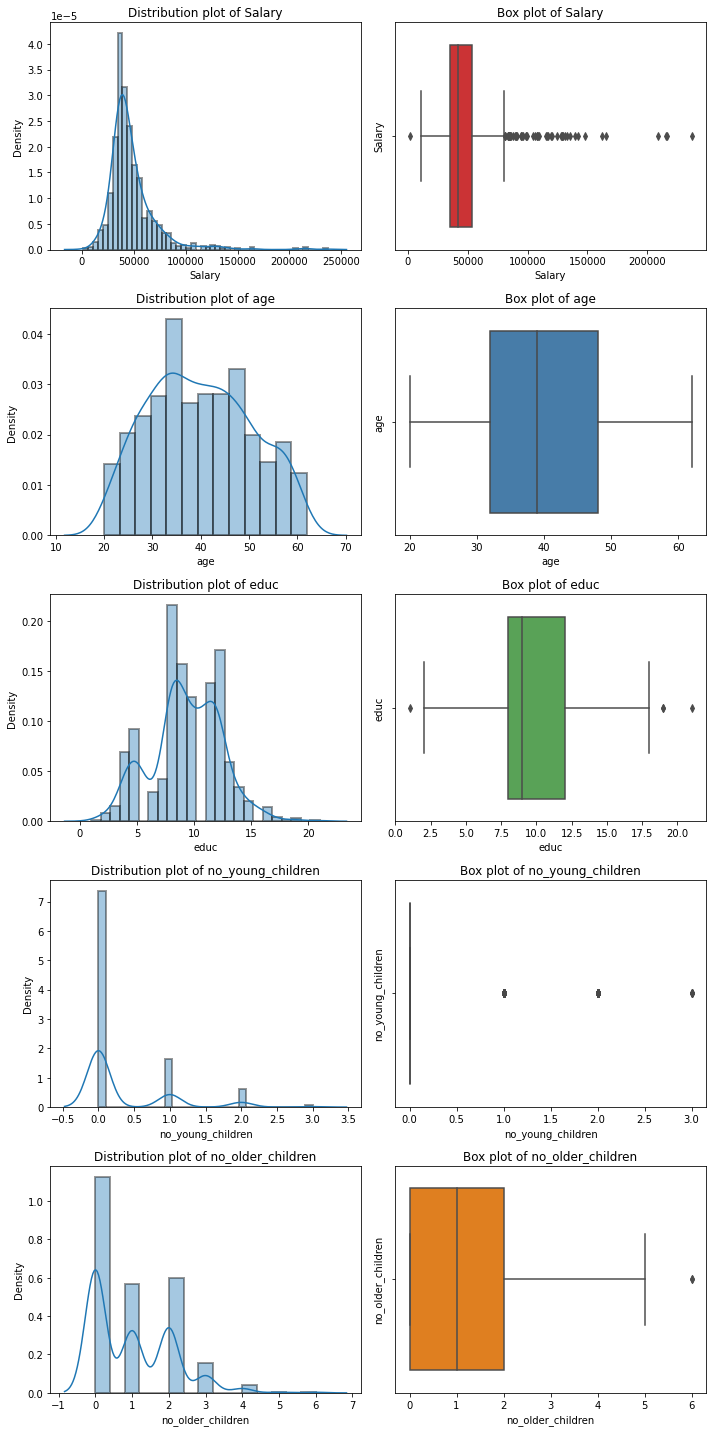

In [ ]:
# Distribution and boxplots of the variables

a = len(holi_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list1 = holi_df.select_dtypes(exclude='object').columns.to_list()

palette1 = itertools.cycle(sns.color_palette(palette='Set1'))

fig1 = plt.figure(figsize=(10,20))

for i in col_list1:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(holi_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = holi_df[i], orient='h', palette=palette1)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
#Outlier detection from Interquartile range (IQR) in duplicate removed data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

for i in col_list1:
    Q1 = holi_df[i].quantile(q=0.25)
    Q3 = holi_df[i].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in {}: {}'.format(i, L_outliers))
    print('Upper outliers in {}: {}'.format(i, U_outliers),'\n')
    print('Number of outliers in {} upper: {}'.format(i, holi_df[holi_df[i]>U_outliers][i].count()))
    print('Number of outliers in {} lower: {}'.format(i, holi_df[holi_df[i]<L_outliers][i].count()),'\n')
    print('% of Outlier in {} upper: {}%'.format(i, round(holi_df[holi_df[i]>U_outliers][i].count()*100/len(holi_df),2)))
    print('% of Outlier in {} lower: {}%'.format(i, round(holi_df[holi_df[i]<L_outliers][i].count()*100/len(holi_df),2)),'\n')
    print('###########################################', '\n')

Lower outliers in Salary: 8105.75
Upper outliers in Salary: 80687.75 

Number of outliers in Salary upper: 56
Number of outliers in Salary lower: 1 

% of Outlier in Salary upper: 6.42%
% of Outlier in Salary lower: 0.11% 

########################################### 

Lower outliers in age: 8.0
Upper outliers in age: 72.0 

Number of outliers in age upper: 0
Number of outliers in age lower: 0 

% of Outlier in age upper: 0.0%
% of Outlier in age lower: 0.0% 

########################################### 

Lower outliers in educ: 2.0
Upper outliers in educ: 18.0 

Number of outliers in educ upper: 3
Number of outliers in educ lower: 1 

% of Outlier in educ upper: 0.34%
% of Outlier in educ lower: 0.11% 

########################################### 

Lower outliers in no_young_children: 0.0
Upper outliers in no_young_children: 0.0 

Number of outliers in no_young_children upper: 207
Number of outliers in no_young_children lower: 0 

% of Outlier in no_young_children upper: 23.74%
% of O

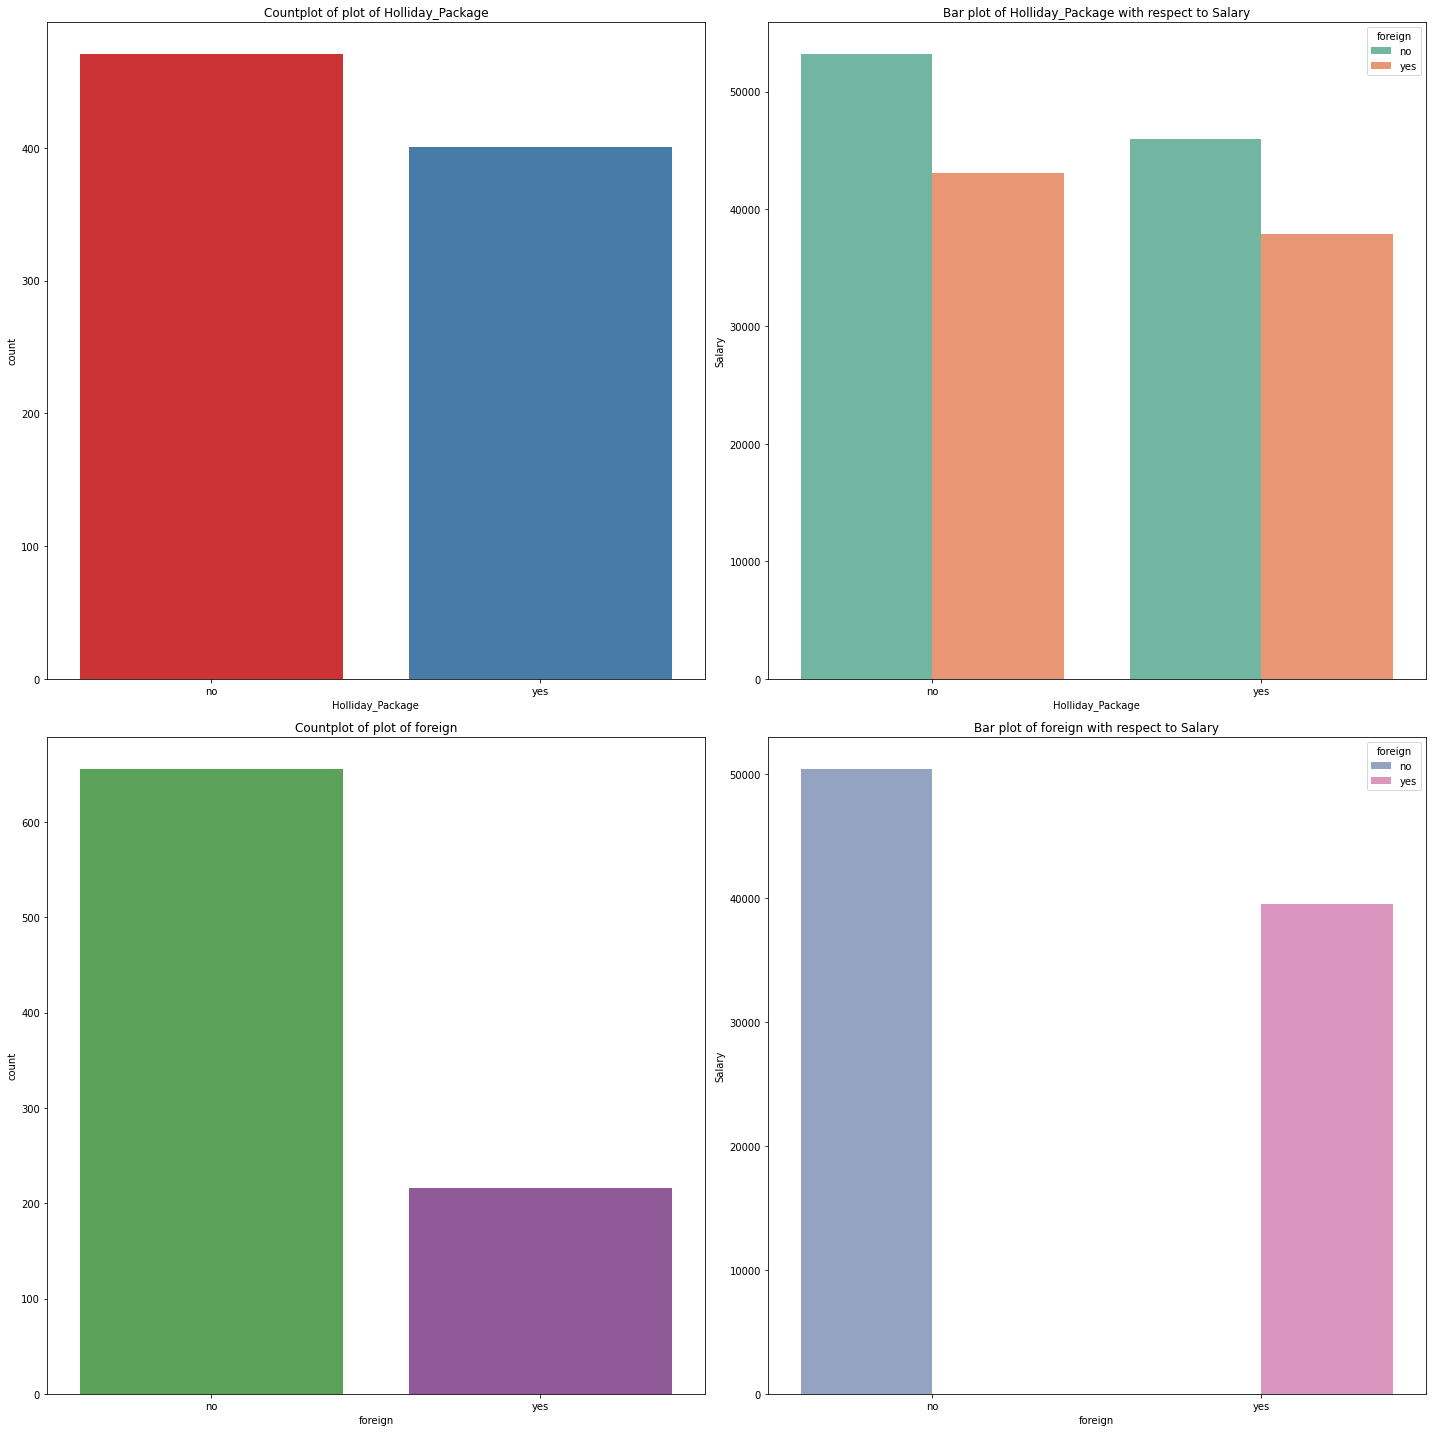

In [ ]:
#Bar plots of the categorical variables

a = len(holi_df.select_dtypes('object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

col_list2 = holi_df.select_dtypes('object').columns.to_list()

palette1 = itertools.cycle(sns.color_palette(palette='Set1'))

palette2 = itertools.cycle(sns.color_palette(palette='Set2'))

fig3 = plt.figure(figsize=(20,20))

for i in col_list2:
    plt.subplot(a, b, c)
    plt.title('Countplot of plot of {}'.format(i))
    plt.xlabel(i)
    sns.countplot(data = holi_df, x = holi_df[i], palette=palette1);
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Bar plot of {} with respect to Salary'.format(i))
    plt.xlabel(i)
    plt.ylabel('Price')
    sns.barplot(data = holi_df, x=holi_df[i],y='Salary', hue='foreign', ci=None, palette=palette2);
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
holi_df['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

There are 54.0% No and 46.0% Yes in the target column


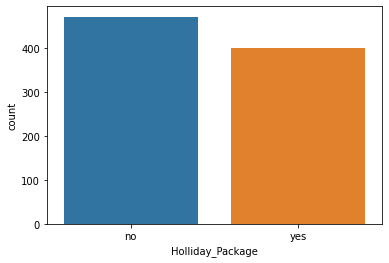

In [ ]:
sns.countplot(data=holi_df, x=holi_df['Holliday_Package']);
no,yes = holi_df['Holliday_Package'].value_counts(normalize=True)
print('There are {}% No and {}% Yes in the target column'.format(round(no,2)*100,round(yes,2)*100))

##### **Bi-Variate Analysis**

<Figure size 720x720 with 0 Axes>

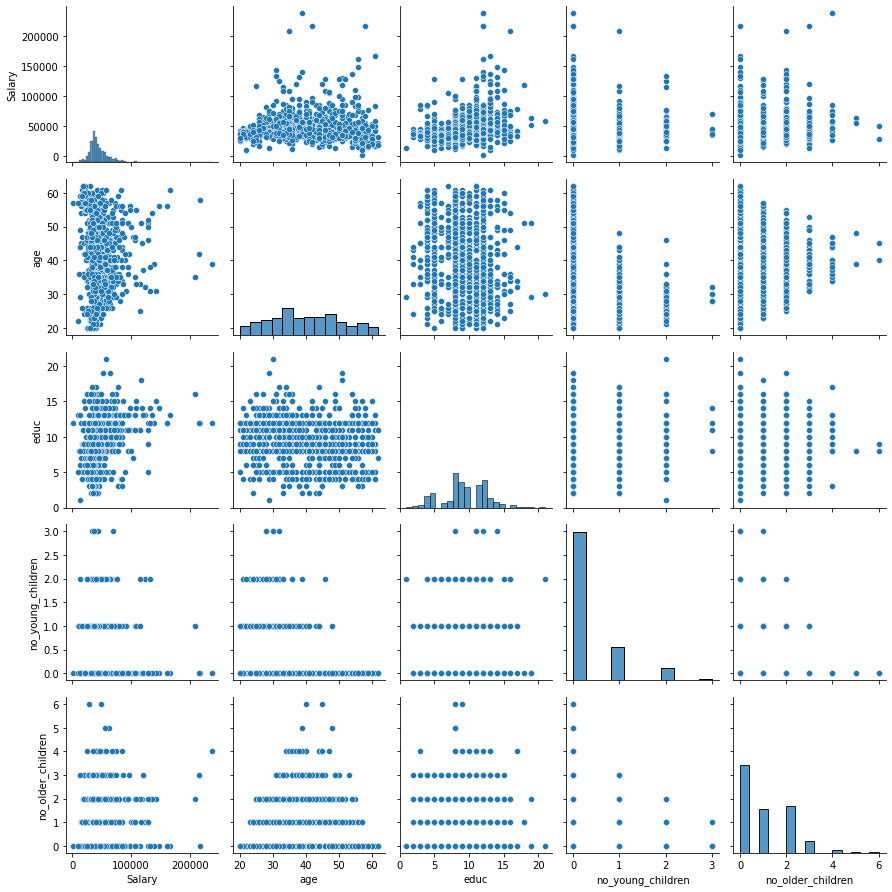

In [ ]:
# Pair plot of the numerical variables
fig4 = plt.figure(figsize=(10,10))
sns.pairplot(data=holi_df[col_list1], palette='Set1')
plt.tight_layout()
plt.show()

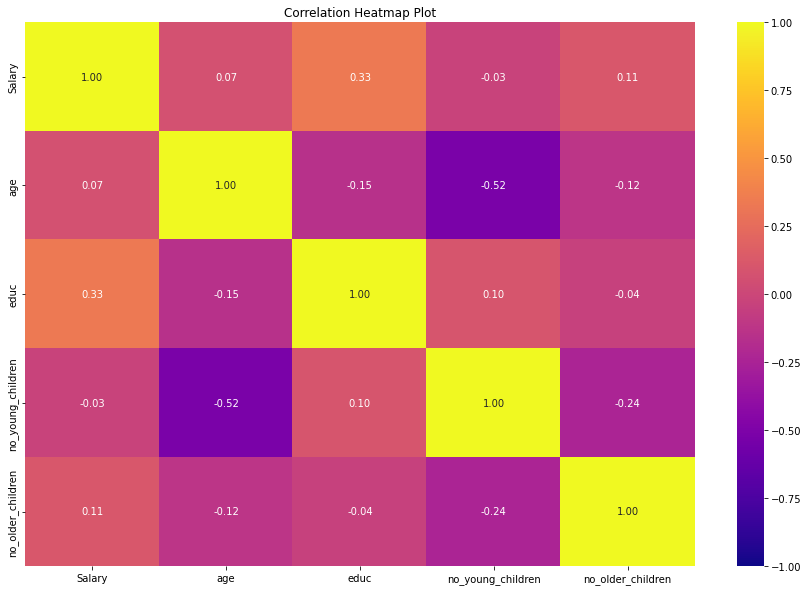

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(holi_df.corr(),2),fmt='.2f',annot=True,cmap='plasma', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [ ]:
for feature in col_list2: 
    print('\n')
    print('Feature:',feature)
    print(pd.Categorical(holi_df[feature].unique()))
    print(pd.Categorical(holi_df[feature].unique()).codes)
    holi_df[feature] = pd.Categorical(holi_df[feature]).codes



Feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


Feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [ ]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [ ]:
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


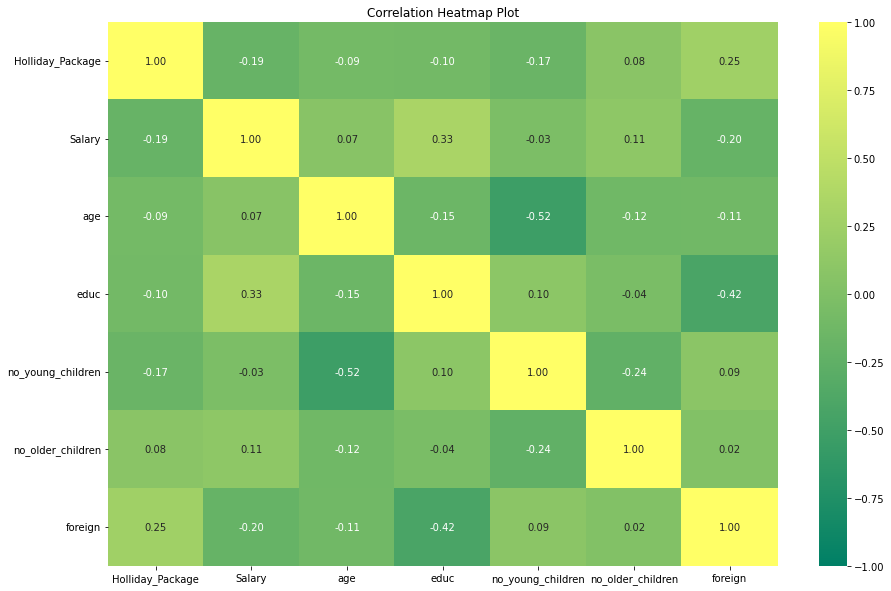

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(round(holi_df.corr(),2),fmt='.2f',annot=True,cmap='summer', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

In [ ]:
x = holi_df.drop('Holliday_Package', axis=1)
Y = holi_df.pop('Holliday_Package')
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=.30, random_state=1)

In [ ]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('y_train',Y_train.shape)
print('y_test',Y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


##### **Logistic Regression**

In [ ]:
# Instantiante the model

log_reg_model = LogisticRegression(random_state=1)

In [ ]:
# Perform grid search of best parameters for Logistic Regression

param_grid_lrm = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'tol': [0.0001,0.00001,0.000001],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'max_iter': [100,1000,10000,100000],
}

grid_search_lrm = GridSearchCV(estimator = log_reg_model, param_grid = param_grid_lrm, cv = 3, n_jobs=-1)

In [ ]:
# Fit the training data on the grid search
grid_search_lrm.fit(x_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [ ]:
# Get the best parameters
grid_search_lrm.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}

In [ ]:
# Create the best grid estimator

best_grid_lrm = grid_search_lrm.best_estimator_

In [ ]:
# Predict on both test & train

Ytrain_predict_lrm = best_grid_lrm.predict(x_train)
Ytest_predict_lrm = best_grid_lrm.predict(x_test)

##### **LDA**

In [ ]:
# Instantiate the LDA model

lda_model = LinearDiscriminantAnalysis()

In [ ]:
# Fit the training data on the grid search
lda_model.fit(x_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Predict on both test & train

Ytrain_predict_lda = lda_model.predict(x_train)
Ytest_predict_lda = lda_model.predict(x_test)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [ ]:
models_names={log_reg_model:'Logistic Regression',lda_model:'Linear Discriminant Analysis'}

##### **Linear Regression Metrics**

Accuracy for the Logistic Regression model on the training set is 
 0.6786885245901639


Classification report for the Logistic Regression model on the training set is 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610





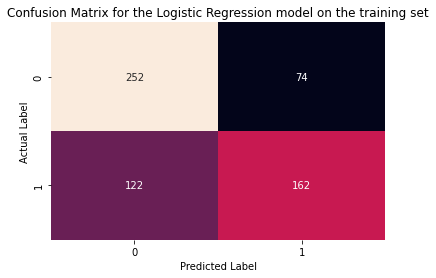

In [ ]:
print('Accuracy for the {} model on the training set is'.format(models_names[log_reg_model]),'\n',accuracy_score(Y_train,Ytrain_predict_lrm))
print('\n')
print('Classification report for the {} model on the training set is'.format(models_names[log_reg_model]),'\n',classification_report(Y_train,Ytrain_predict_lrm))
print('\n')
sns.heatmap(confusion_matrix(Y_train,Ytrain_predict_lrm),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the training set'.format(models_names[log_reg_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Linear Regression Model for the training set is 0.7430009504882052 



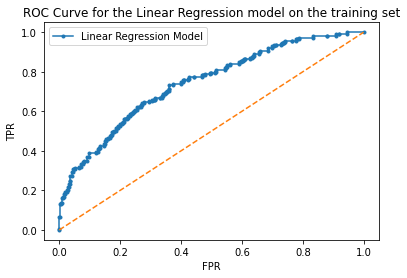

In [ ]:
print('Area under the curve for Linear Regression Model for the training set is',roc_auc_score(Y_train,best_grid_lrm.predict_proba(x_train)[:,1]),'\n')

#plt.figure(figsize=(12,7))
fpr_lrm, tpr_lrm, thresholds = roc_curve(Y_train,best_grid_lrm.predict_proba(x_train)[:,1])
plt.plot(fpr_lrm, tpr_lrm, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the {}'.format('Linear Regression model on the training set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Linear Regression Model'])
plt.show()

Accuracy for the Logistic Regression model on the testing set is 
 0.6450381679389313


Classification report for the Logistic Regression model on the testing set is 
               precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262





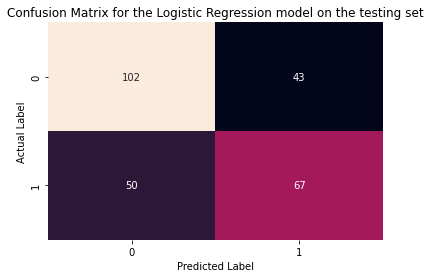

In [ ]:
print('Accuracy for the {} model on the testing set is'.format(models_names[log_reg_model]),'\n',accuracy_score(Y_test,Ytest_predict_lrm))
print('\n')
print('Classification report for the {} model on the testing set is'.format(models_names[log_reg_model]),'\n',classification_report(Y_test,Ytest_predict_lrm))
print('\n')
sns.heatmap(confusion_matrix(Y_test,Ytest_predict_lrm),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the testing set'.format(models_names[log_reg_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Linear Regression Model for the testing set is 0.7045682287061598 



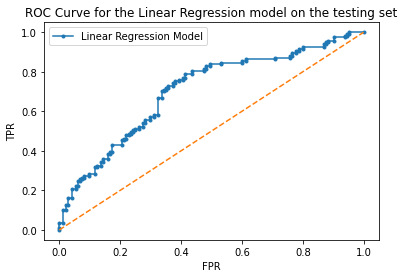

In [ ]:
print('Area under the curve for Linear Regression Model for the testing set is',roc_auc_score(Y_test,best_grid_lrm.predict_proba(x_test)[:,1]),'\n')

#plt.figure(figsize=(12,7))
fpr_lrm, tpr_lrm, thresholds = roc_curve(Y_test,best_grid_lrm.predict_proba(x_test)[:,1])
plt.plot(fpr_lrm, tpr_lrm, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the {}'.format('Linear Regression model on the testing set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Linear Regression Model'])
plt.show()

##### **Logistic Regression Metrics**

Accuracy for the Linear Discriminant Analysis model on the training set is 
 0.6721311475409836


Classification report for the Linear Discriminant Analysis model on the training set is 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610





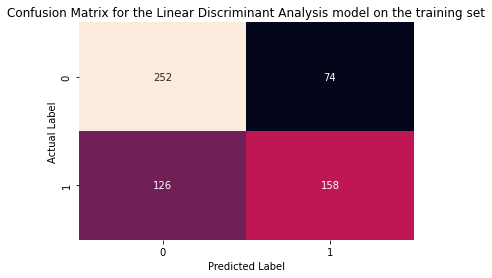

In [ ]:
print('Accuracy for the {} model on the training set is'.format(models_names[lda_model]),'\n',accuracy_score(Y_train,Ytrain_predict_lda))
print('\n')
print('Classification report for the {} model on the training set is'.format(models_names[lda_model]),'\n',classification_report(Y_train,Ytrain_predict_lda))
print('\n')
sns.heatmap(confusion_matrix(Y_train,Ytrain_predict_lda),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the training set'.format(models_names[lda_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Linear Discriminant Analysis Model for the training set is 0.7421152682968979 



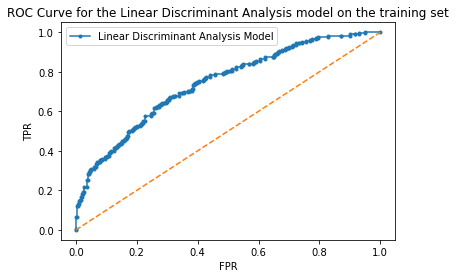

In [ ]:
print('Area under the curve for Linear Discriminant Analysis Model for the training set is',roc_auc_score(Y_train,lda_model.predict_proba(x_train)[:,1]),'\n')

#plt.figure(figsize=(12,7))
fpr_lrm, tpr_lrm, thresholds = roc_curve(Y_train,lda_model.predict_proba(x_train)[:,1])
plt.plot(fpr_lrm, tpr_lrm, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the {}'.format('Linear Discriminant Analysis model on the training set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Linear Discriminant Analysis Model'])
plt.show()

Accuracy for the Linear Discriminant Analysis model on the testing set is 
 0.6412213740458015


Classification report for the Linear Discriminant Analysis model on the testing set is 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262





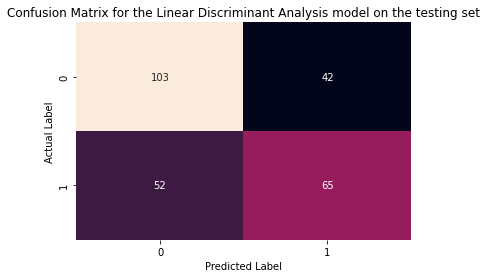

In [ ]:
print('Accuracy for the {} model on the testing set is'.format(models_names[lda_model]),'\n',accuracy_score(Y_test,Ytest_predict_lda))
print('\n')
print('Classification report for the {} model on the testing set is'.format(models_names[lda_model]),'\n',classification_report(Y_test,Ytest_predict_lda))
print('\n')
sns.heatmap(confusion_matrix(Y_test,Ytest_predict_lda),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the {} model on the testing set'.format(models_names[lda_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Linear Discriminant Analysis Model for the testing set is 0.7029177718832891 



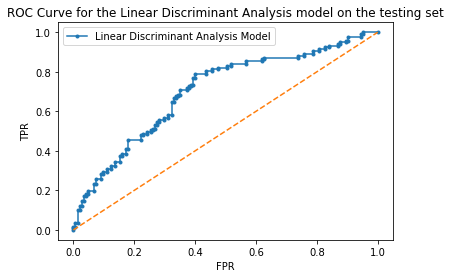

In [ ]:
print('Area under the curve for Linear Discriminant Analysis Model for the testing set is',roc_auc_score(Y_test,lda_model.predict_proba(x_test)[:,1]),'\n')

#plt.figure(figsize=(12,7))
fpr_lrm, tpr_lrm, thresholds = roc_curve(Y_test,lda_model.predict_proba(x_test)[:,1])
plt.plot(fpr_lrm, tpr_lrm, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the {}'.format('Linear Discriminant Analysis model on the testing set'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Linear Discriminant Analysis Model'])
plt.show()

In [ ]:
lr_train_acc = accuracy_score(Y_train,Ytrain_predict_lrm)
lr_train_auc = roc_auc_score(Y_train,best_grid_lrm.predict_proba(x_train)[:,1])
lr_train_precision = precision_score(Y_train,Ytrain_predict_lrm)
lr_train_recall = recall_score(Y_train,Ytrain_predict_lrm)
lr_train_f1 = f1_score(Y_train,Ytrain_predict_lrm)
lr_test_acc  = accuracy_score(Y_test,Ytest_predict_lrm)
lr_test_auc = roc_auc_score(Y_test,best_grid_lrm.predict_proba(x_test)[:,1])
lr_test_precision = precision_score(Y_test,Ytest_predict_lrm)
lr_test_recall = recall_score(Y_test,Ytest_predict_lrm)
lr_test_f1 = f1_score(Y_test,Ytest_predict_lrm)

In [ ]:
lda_train_acc = accuracy_score(Y_train,Ytrain_predict_lda)
lda_train_auc = roc_auc_score(Y_train,lda_model.predict_proba(x_train)[:,1])
lda_train_precision = precision_score(Y_train,Ytrain_predict_lda)
lda_train_recall = recall_score(Y_train,Ytrain_predict_lda)
lda_train_f1 = f1_score(Y_train,Ytrain_predict_lda)
lda_test_acc  = accuracy_score(Y_test,Ytest_predict_lda)
lda_test_auc = roc_auc_score(Y_test,lda_model.predict_proba(x_test)[:,1])
lda_test_precision = precision_score(Y_test,Ytest_predict_lda)
lda_test_recall = recall_score(Y_test,Ytest_predict_lda)
lda_test_f1 = f1_score(Y_test,Ytest_predict_lda)

In [ ]:
index=['Accuracy', 'ROC-AUC', 'Precision','Recall','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_precision,lr_train_recall,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_precision,lr_test_recall,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_precision,lda_train_recall,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_precision,lda_test_recall,lda_test_f1],},index=index)
round(data,3)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.679,0.645,0.672,0.641
ROC-AUC,0.743,0.705,0.742,0.703
Precision,0.686,0.609,0.681,0.607
Recall,0.570,0.573,0.556,0.556
F1 Score,0.623,0.590,0.612,0.580


### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.